In [1]:
from prophet import Prophet


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [5]:
ID_train = train.ID


In [6]:
train.drop(['ID'], axis=1, inplace=True)


In [7]:
train

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


In [8]:
train.rename(columns={'DateTime':'ds', 'Junction': 'add1', 'Vehicles': 'y'}, inplace=True)


Text(0, 0.5, 'y')

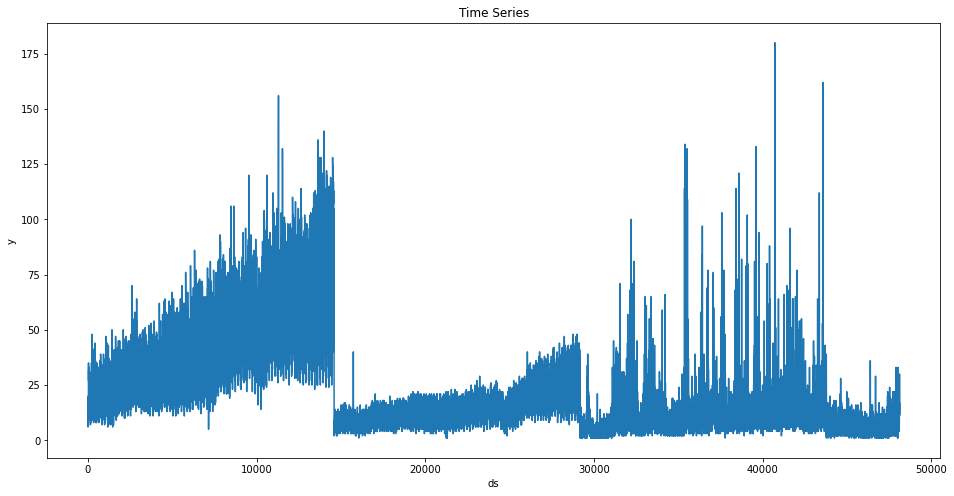

In [9]:
import matplotlib.pyplot as plt

train['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

In [10]:
X_train = train.loc[train["ds"]<"2017-01-01"]
X_val  = train.loc[train["ds"]>="2017-01-01"]

In [11]:
model = Prophet()
model.add_regressor('add1')
model.fit(X_train)

21:47:51 - cmdstanpy - INFO - Chain [1] start processing
21:48:06 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 00:00:00,26.627755,20.727028,46.569283,26.627755,26.627755,12.28423,12.28423,12.28423,7.348789,...,12.28423,12.28423,12.28423,-5.192998,-5.192998,-5.192998,0.0,0.0,0.0,33.976545
1,2017-01-01 00:00:00,26.627755,-3.801788,23.447393,26.627755,26.627755,-12.28423,-12.28423,-12.28423,-17.219670,...,-12.28423,-12.28423,-12.28423,-5.192998,-5.192998,-5.192998,0.0,0.0,0.0,9.408085
2,2017-01-01 00:00:00,26.627755,8.283294,35.594694,26.627755,26.627755,0.00000,0.00000,0.00000,-4.935441,...,0.00000,0.00000,0.00000,-5.192998,-5.192998,-5.192998,0.0,0.0,0.0,21.692315
3,2017-01-01 00:00:00,26.627755,-16.518170,10.631795,26.627755,26.627755,-24.56846,-24.56846,-24.56846,-29.503900,...,-24.56846,-24.56846,-24.56846,-5.192998,-5.192998,-5.192998,0.0,0.0,0.0,-2.876145
4,2017-01-01 01:00:00,26.627469,-6.125624,20.051171,26.627469,26.627469,-12.28423,-12.28423,-12.28423,-19.912822,...,-12.28423,-12.28423,-12.28423,-5.275940,-5.275940,-5.275940,0.0,0.0,0.0,6.714647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,2017-06-30 22:00:00,25.384539,5.586414,76.309031,-6.274980,56.730471,12.28423,12.28423,12.28423,16.141610,...,12.28423,12.28423,12.28423,-0.219343,-0.219343,-0.219343,0.0,0.0,0.0,41.526148
17372,2017-06-30 23:00:00,25.384252,-8.028618,61.942173,-6.279016,56.730943,0.00000,0.00000,0.00000,2.095612,...,0.00000,0.00000,0.00000,-0.386107,-0.386107,-0.386107,0.0,0.0,0.0,27.479864
17373,2017-06-30 23:00:00,25.384252,4.909196,74.918434,-6.282766,56.731701,12.28423,12.28423,12.28423,14.379841,...,12.28423,12.28423,12.28423,-0.386107,-0.386107,-0.386107,0.0,0.0,0.0,39.764094
17374,2017-06-30 23:00:00,25.384252,-18.565642,49.215149,-6.286515,56.732459,-12.28423,-12.28423,-12.28423,-10.188618,...,-12.28423,-12.28423,-12.28423,-0.386107,-0.386107,-0.386107,0.0,0.0,0.0,15.195634


In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

30.689316451431832


In [21]:
df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual,predicted
0,27,33
1,23,9
2,17,21
3,16,-2
4,16,6
...,...,...
17371,11,41
17372,30,27
17373,16,39
17374,22,15


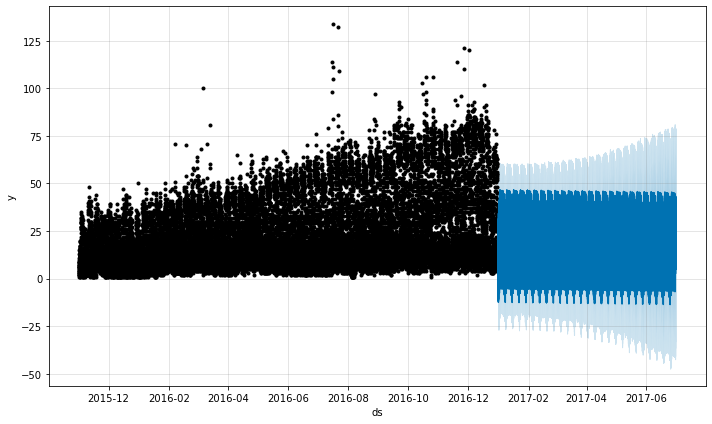

In [22]:
fig1 = model.plot(forecast)


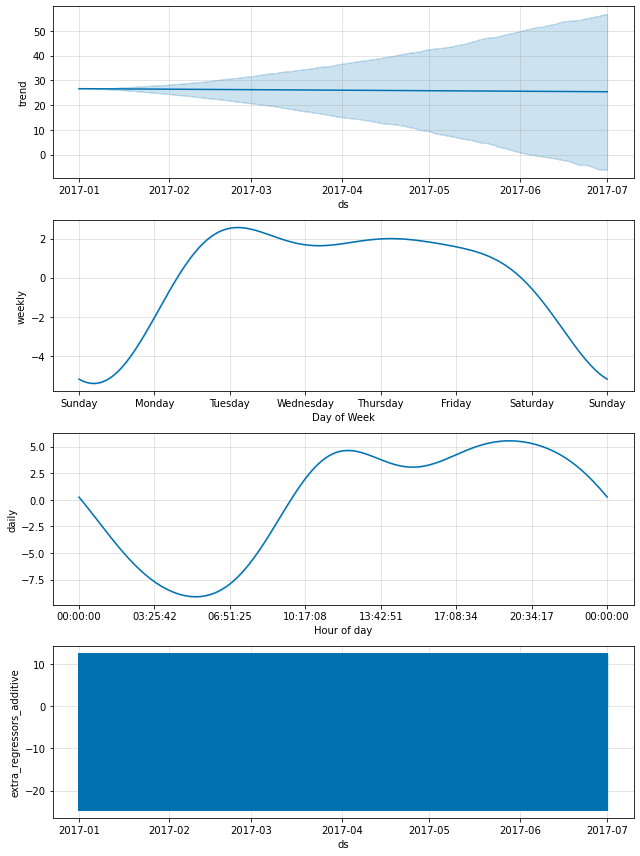

In [23]:
fig2 = model.plot_components(forecast)
